In [3]:
import pandas as pd

## DataFrame vs 2D Array, Rows and Columns

A key difference between Numpy and Pandas are in what index information they assume you'll use to query and organize the data in their data structures:

|           |        | Ordered | Named |
| :--:      | :--:   | :--:    | :-:   |
| Array     | Rows   | ✔️       |       |
| Array     | Columns| ✔️       |       |
| DataFrame | Rows   | ✔️       | ✔️     |
| DataFrame | Columns|         | ✔️     |

This reliance on named indices makes it straightforward to work with Pandas data **relationally**, thinking of each row as a specific Record with named Fields. 

### Indexing Rows

Because DataFrame rows are both ordered and named, they can be indexed using either approach, and even both!  Column operations tend to be name-specific:

| Axis        | Ordered Index | Named Index    | Ordered Slice    | Named Slice              |  NamedOrdered Slice     |
| :--:        | :--:          | :--:           | :--:             | :--:                     | :--:                    |
| **Rows**    | df.iloc\[0\]    | df.loc\['John'\] | df.iloc\[0:2\]     | df.loc\[\['Jim', 'John'\]\]  |  df.loc\['Jim':'Jenny'\]  |
| **Columns** |               |  df\['Q1'\]      |                  |  df\[\['Q1', 'Q4'\]\]        |                         |


To reduce total typing, Pandas also has alternate interfaces for the same operations:

| Axis        | Ordered Index | Named Index    | Ordered Slice    | Named Slice              |  NamedOrdered Slice     |
| :--:        | :--:          | :--:           | :--:             | :--:                     | :--:                    |
| **Rows**    |               |                | df\[0:2\]          |                          |  df\['Jim':'Jenny'\]      |
| **Columns** |               |  df.Q1         |                  |  df\[\['Q1', 'Q4'\]\]        |                         |



### The Titanic Dataset

In [4]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [9]:
# !pip install --upgrade pandas

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\miniconda\\Lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


## Exercises

Select the "age" column

Get rows 10-16

Select the first 5 rows of the "sex" column

Select the "fare" column

Select the "embark_town" column

Select the "survived" and "age" columns:

Select the last 3 rows of the "alive" column

Select rows 5-10 of the "class" column

## Summarizing / Aggregating Data in DataFrames

Pandas also supplies many different aggregation functions as methods:

```python
df.mean()
df['Column'].mean()
```

**Examples**:  mean, median, max, min, count, value_counts, unique

#### Exercises

What is the mean ticket fare that the passengers paid on the titanic?

What is the median ticket fare that the passengers paid on the titanic? 

How many passengers does this dataset contain? 

What class ticket did the 10th (index = 9) passenger in this dataset buy?

What proportion of the passengers were alone on the titanic?

How many different classes were on the titanic?

How many men and women are in this dataset? (value_counts())

How many passengers are sitting in each class?

How many passengers of each sex are sitting in each class?

## Transforming Data: Broadcasting Element-Wise Operations

Any transformation function can be performed on each element of a column, or even all columns of a DataFrame.  Here are several options for this approach:

Numpy-like Operator syntax with Broadcasting:
```python
df['Column1'] * 100
```

Functions-style syntax:
```python
np.sqrt(df['Column1'])
```

Special broadcasted-version of different classes' Methods:
```python
df['Column1'].str.upper()
```


****Exercises****: Let's try some of these on the data:

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Make a new column called "isAdult", with True values if they were 18 or older and False if not.

Get everyone's age if they were still alive today (hint: Titanic sunk in 1912)

Make a column called "not_survived", the opposite of the "survived" column.


Make a Column called "Adjusted Fare", with the cost of a ticket in today's money:  (See https://www.in2013dollars.com/uk/inflation/1912?amount=1 for the conversion rate)

## Querying/Filtering Data

To get rows based on their value, Pandas supports both Numpy's logical indexing for filtering rows and an SQL-like query string.  For example, to get all the rows of a dataframe that is positive for Column1:

```python
positive_rows = df['Column1'] > 0
df[positive_rows]
```

Often, this is done in a single line:

```python
df[df['Column1'] > 0]
```


#### Exercises
Let's go back to the Titanic dataset and do some data querying:

In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Did the oldest passenger on the Titanic survive?

Where did the youngest passenger on the Titanic embark from?

How many passengers on the Titanic embarked from Cherbourg?

What is mean ticket fare for the 1st class?

In [11]:
df[df['class'] == "First"]['fare'].mean()

84.1546875

 The 2nd?

In [13]:
df[df['class'] == "Second"]['fare'].mean()

20.662183152173913

The 3rd?

In [12]:
df[df['class'] == "Third"]['fare'].mean()

13.675550101832993

In [28]:
import numpy as np

In [30]:
dfg = df.groupby(["class", "embarked"])[['fare', 'age']].apply(np.mean)
dfg

fare        age
class  embarked                       
First  C         104.718529  38.027027
       Q          90.000000  38.500000
       S          70.364862  38.152037
Second C          25.358335  22.766667
       Q          12.350000  43.500000
       S          20.327439  30.386731
Third  C          11.214083  20.741951
       Q          11.183393  25.937500
       S          14.644083  25.696552

In [33]:
dfg.reset_index()

,class,embarked,fare,age
0,First,C,104.718529,38.027027
1,First,Q,90.000000,38.500000
2,First,S,70.364862,38.152037
3,Second,C,25.358335,22.766667
4,Second,Q,12.350000,43.500000
5,Second,S,20.327439,30.386731
6,Third,C,11.214083,20.741951
7,Third,Q,11.183393,25.937500
8,Third,S,14.644083,25.696552


In [34]:
import seaborn as sns

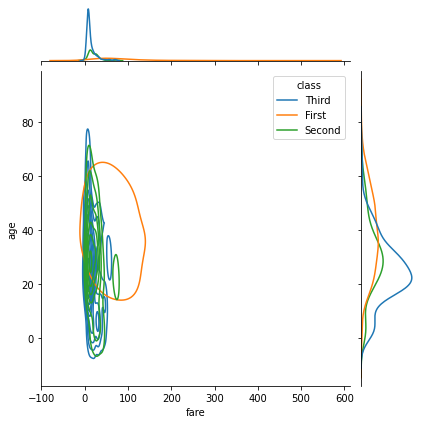

In [37]:
sns.jointplot(data=df, x="fare", y="age", hue="class", kind='kde');

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


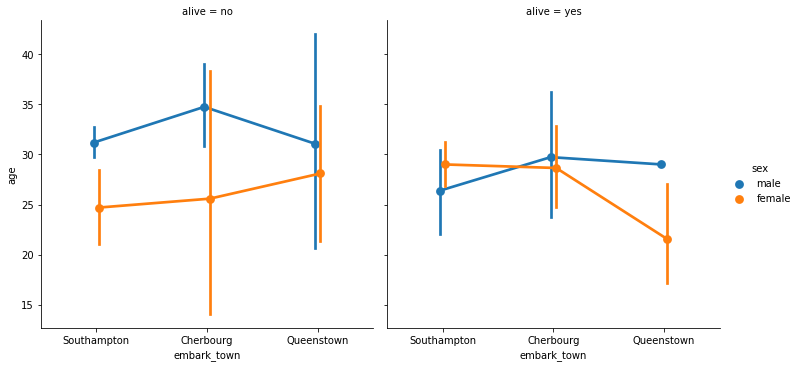

In [49]:
sns.catplot(data=df, x="embark_town", y="age", hue="sex", kind="point", col="alive", dodge=True);

How many total people survived from Southampton?

From Cherbourg?

How many people from Southampton had first class tickets?